In [183]:
# importing the library 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import matplotlib

In [184]:
filename = input("Enter your filename : ")

Enter your filename : pca_demo.txt


In [185]:
print("filename is :",filename)

filename is : pca_demo.txt


In [186]:
# global initializations
k = 2

In [187]:
# mean_vector takes a dataframe data as an input and returns a k dimentional mean vector
def mean_vector(data):
    vector = np.mean(data, axis = 0)
    #vector=[]
    #data = data.to_numpy()
    #for i in range(len(data[0])):
    #    col_mean = np.mean(data[i,:])
     #   vector.append(col_mean)
    #vector = np.asarray(vector)
    print(vector)
    return vector

# substract the mean from the original data to get the new data
def substract_mean(data,mean):
    data = data.to_numpy()
    for i in range(len(data)):
        for j in range(len(data[0])):
            data[i][j] = data[i][j] - mean[j]
    return data

# k_largest_eigen_val returns the eigen vector with k largest eigen value
def k_largest_eigen_val(eig_val,eig_vec,k):
    pair = []
    for i in range(len(eig_val)):
        get_pair = (np.abs(eig_val[i]), eig_vec[:,i])
        pair.append(get_pair)
    print("**********")
    print(type(pair))
    sorted(pair,key=lambda x: x[0],reverse = True)
    data = pair[0][1].reshape(length,1)
    for i in range(1,k):
        updated_data = np.hstack((data, pair[i][1].reshape(length,1)))
        data = updated_data
    return data

READING DATA FROM FILE      0     1     2     3     4     5     6     7     8     9    ...   291  \
0   0.46  0.60  0.45  0.55  0.49  0.56  0.44  0.44  0.56  0.45  ...  0.43   
1   0.49  0.53  0.48  0.53  0.49  0.59  0.45  0.43  0.52  0.39  ...  0.45   
2   0.47  0.57  0.46  0.54  0.49  0.57  0.44  0.44  0.55  0.42  ...  0.44   
3   0.43  0.55  0.45  0.51  0.50  0.44  0.51  0.54  0.53  0.60  ...  0.48   
4   0.54  0.48  0.53  0.50  0.50  0.48  0.53  0.54  0.50  0.42  ...  0.53   
5   0.49  0.50  0.47  0.51  0.49  0.56  0.47  0.44  0.50  0.43  ...  0.46   
6   0.42  0.59  0.44  0.53  0.50  0.45  0.49  0.53  0.56  0.60  ...  0.46   
7   0.46  0.62  0.45  0.56  0.49  0.53  0.44  0.47  0.58  0.47  ...  0.43   
8   0.48  0.48  0.48  0.49  0.49  0.49  0.51  0.50  0.49  0.49  ...  0.50   
9   0.43  0.56  0.42  0.53  0.48  0.61  0.42  0.39  0.53  0.49  ...  0.41   
10  0.59  0.54  0.56  0.54  0.51  0.47  0.52  0.56  0.55  0.31  ...  0.54   
11  0.48  0.59  0.46  0.55  0.49  0.55  0.45  0.46  0

MEAN SUBSTRACTED FROM THE ORIGINAL DATA        0      1       2       3      4       5       6       7       8    \
0  -0.0318  0.072 -0.0359  0.0325 -0.006  0.0535 -0.0504 -0.0566  0.0347   
1  -0.0018  0.002 -0.0059  0.0125 -0.006  0.0835 -0.0404 -0.0666 -0.0053   
2  -0.0218  0.042 -0.0259  0.0225 -0.006  0.0635 -0.0504 -0.0566  0.0247   
3  -0.0618  0.022 -0.0359 -0.0075  0.004 -0.0665  0.0196  0.0434  0.0047   
4   0.0482 -0.048  0.0441 -0.0175  0.004 -0.0265  0.0396  0.0434 -0.0253   
5  -0.0018 -0.028 -0.0159 -0.0075 -0.006  0.0535 -0.0204 -0.0566 -0.0253   
6  -0.0718  0.062 -0.0459  0.0125  0.004 -0.0565 -0.0004  0.0334  0.0347   
7  -0.0318  0.092 -0.0359  0.0425 -0.006  0.0235 -0.0504 -0.0266  0.0547   
8  -0.0118 -0.048 -0.0059 -0.0275 -0.006 -0.0165  0.0196  0.0034 -0.0353   
9  -0.0618  0.032 -0.0659  0.0125 -0.016  0.1035 -0.0704 -0.1066  0.0047   
10  0.0982  0.012  0.0741  0.0225  0.014 -0.0365  0.0296  0.0634  0.0247   
11 -0.0118  0.062 -0.0259  0.0325 -0.006  0.0435

/Users/riyahazra/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


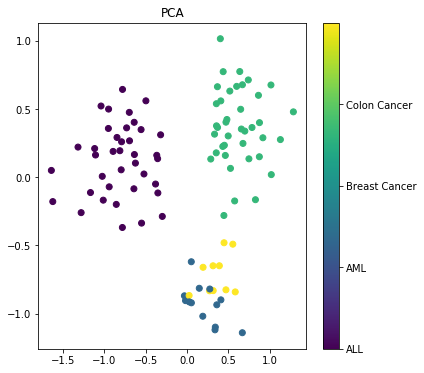

In [188]:
# reading the data from the text file to the dataframe
data = pd.read_csv(filename, sep="\t", header=None)
print("READING DATA FROM FILE",data)

# Step 1: taking the whole dataset ignoring the last class label
label = data.iloc[:,-1]
print(label)
data = data.drop(data.columns[len(data.columns)-1], axis=1)
print("DATA AFTER DROPPING THE LAST COLUMN",data)
length = len(data.columns)
print("length ",length)

# step 2 :  calculating the k dimensional mean vector
mean_vector = mean_vector(data)
print("CALCULATING THE MEAN VECTOR",mean_vector)
print(type(mean_vector))

# step 3: Substract the mean from the orginal data
data = pd.DataFrame(substract_mean(data,mean_vector))
print("MEAN SUBSTRACTED FROM THE ORIGINAL DATA",data)

# step 4 : calculating the covariance matrix for the dataset
cov_matrix = data.cov()
print("COVARIANCE MATRIX CALCULATED",cov_matrix)

# step 5 : calculating the eigenvectors and the corresponding eigen value
eig_val, eig_vec = np.linalg.eig(cov_matrix)
print("EIGEN VALUE CALCULATED",eig_val)
print("EIGEN VECTOR CALCULATED", eig_vec)

# step 6 : Sorting the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigen value
k_largest = k_largest_eigen_val(eig_val,eig_vec,k)
print("K LARGEST EIGEN VECTOR FOR THE K LARGEST EIGEN VALUE",k_largest)

# step 7 : Transforming the samples onto the new subspace
data = data.T
transformed = k_largest.T.dot(data)
transformed

# step 8 : Visualization of the 2D data
# obtaining the unique label from the last column
a = label.unique()
print(a)

# assigning unique colours to the labels 
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(a))]
print(colors)

label = pd.Categorical(pd.factorize(label)[0])
print(label)
# Obtaining the x and the y value
x = []
y = []
for i in range(len(transformed[0])):
    x.append(transformed[0][i])
for j in range(len(transformed[0])):
    y.append(transformed[1][j])
    
# using scatter plot to obtain the 2D image
fig = plt.figure(figsize=(6,6))
plt.scatter(x, y, c=label)
cb = plt.colorbar()
plt.title("PCA")
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(a)

Dimension reduction using TSNE

READING DATA FROM FILE      0     1     2     3     4     5     6     7     8     9    ...   291  \
0   0.46  0.60  0.45  0.55  0.49  0.56  0.44  0.44  0.56  0.45  ...  0.43   
1   0.49  0.53  0.48  0.53  0.49  0.59  0.45  0.43  0.52  0.39  ...  0.45   
2   0.47  0.57  0.46  0.54  0.49  0.57  0.44  0.44  0.55  0.42  ...  0.44   
3   0.43  0.55  0.45  0.51  0.50  0.44  0.51  0.54  0.53  0.60  ...  0.48   
4   0.54  0.48  0.53  0.50  0.50  0.48  0.53  0.54  0.50  0.42  ...  0.53   
5   0.49  0.50  0.47  0.51  0.49  0.56  0.47  0.44  0.50  0.43  ...  0.46   
6   0.42  0.59  0.44  0.53  0.50  0.45  0.49  0.53  0.56  0.60  ...  0.46   
7   0.46  0.62  0.45  0.56  0.49  0.53  0.44  0.47  0.58  0.47  ...  0.43   
8   0.48  0.48  0.48  0.49  0.49  0.49  0.51  0.50  0.49  0.49  ...  0.50   
9   0.43  0.56  0.42  0.53  0.48  0.61  0.42  0.39  0.53  0.49  ...  0.41   
10  0.59  0.54  0.56  0.54  0.51  0.47  0.52  0.56  0.55  0.31  ...  0.54   
11  0.48  0.59  0.46  0.55  0.49  0.55  0.45  0.46  0

/Users/riyahazra/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


(100, 2)
TRANSFORMED [[-7.4890637   3.8269637 ]
 [-7.1032944   2.3609278 ]
 [-7.187896    3.2016988 ]
 [-2.4320533  -3.3283248 ]
 [ 3.3602853  -4.1995115 ]
 [-5.961022    2.0678747 ]
 [-3.0715468  -3.4282663 ]
 [-7.1744823   4.3735237 ]
 [ 1.4926385  -3.0220084 ]
 [-8.553484    3.124811  ]
 [ 5.3498044  -5.5477123 ]
 [-6.6963797   3.7793994 ]
 [ 3.444957   -3.3064535 ]
 [-5.333787    4.168779  ]
 [-5.3054132   2.8109095 ]
 [ 2.6094828  -3.945487  ]
 [-7.778338    2.3307369 ]
 [ 2.920118   -4.0207686 ]
 [ 1.7920852  -3.2454498 ]
 [ 2.7994838  -5.1776085 ]
 [-0.22459862 -1.1429437 ]
 [-6.069723    4.9527903 ]
 [ 2.7041886  -4.6591125 ]
 [-3.3136518  -3.7438338 ]
 [ 0.04328736 -1.1885674 ]
 [-5.826312    4.271616  ]
 [-7.275293    2.6046824 ]
 [-3.1928985  -3.5817509 ]
 [-5.796859    2.4973187 ]
 [-6.035455    3.6683965 ]
 [ 3.0688555  -3.4125204 ]
 [ 5.292953   -3.7213912 ]
 [-0.585627   -1.3529392 ]
 [ 3.104249   -4.781535  ]
 [-7.275706    4.735299  ]
 [ 3.5091076  -4.880314  ]
 [-2.06

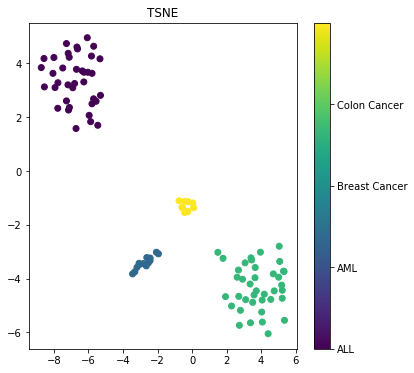

In [189]:
from sklearn.manifold import TSNE
# reading the data from the text file to the dataframe
data = pd.read_csv(filename, sep="\t", header=None)
print("READING DATA FROM FILE",data)

# Step 1: taking the whole dataset ignoring the last class label
label = data.iloc[:,-1]
print(label)
data = data.drop(data.columns[len(data.columns)-1], axis=1)
#data = data.T
print("DATA AFTER DROPPING THE LAST COLUMN",data)

#X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
transformed = TSNE(n_components=2).fit_transform(data)
print(transformed.shape)
print("TRANSFORMED",transformed)
print(len(transformed))
print(len(transformed[0]))
# step 8 : Visualization of the 2D data
# obtaining the unique label from the last column
a = label.unique()
print(a)

# assigning unique colours to the labels 
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(a))]
print(colors)

label = pd.Categorical(pd.factorize(label)[0])
print(label)
# Obtaining the x and the y value
x = []
y = []
for i in range(len(transformed)):
    x.append(transformed[i][0])
print(x)
for j in range(len(transformed)):
    y.append(transformed[j][1])
print(y)
    
# using scatter plot to obtain the 2D image
fig = plt.figure(figsize=(6,6))
plt.scatter(x, y, c=label)
cb = plt.colorbar()
plt.title("TSNE")
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(a)

READING DATA FROM FILE      0     1     2     3     4     5     6     7     8     9    ...   291  \
0   0.46  0.60  0.45  0.55  0.49  0.56  0.44  0.44  0.56  0.45  ...  0.43   
1   0.49  0.53  0.48  0.53  0.49  0.59  0.45  0.43  0.52  0.39  ...  0.45   
2   0.47  0.57  0.46  0.54  0.49  0.57  0.44  0.44  0.55  0.42  ...  0.44   
3   0.43  0.55  0.45  0.51  0.50  0.44  0.51  0.54  0.53  0.60  ...  0.48   
4   0.54  0.48  0.53  0.50  0.50  0.48  0.53  0.54  0.50  0.42  ...  0.53   
5   0.49  0.50  0.47  0.51  0.49  0.56  0.47  0.44  0.50  0.43  ...  0.46   
6   0.42  0.59  0.44  0.53  0.50  0.45  0.49  0.53  0.56  0.60  ...  0.46   
7   0.46  0.62  0.45  0.56  0.49  0.53  0.44  0.47  0.58  0.47  ...  0.43   
8   0.48  0.48  0.48  0.49  0.49  0.49  0.51  0.50  0.49  0.49  ...  0.50   
9   0.43  0.56  0.42  0.53  0.48  0.61  0.42  0.39  0.53  0.49  ...  0.41   
10  0.59  0.54  0.56  0.54  0.51  0.47  0.52  0.56  0.55  0.31  ...  0.54   
11  0.48  0.59  0.46  0.55  0.49  0.55  0.45  0.46  0

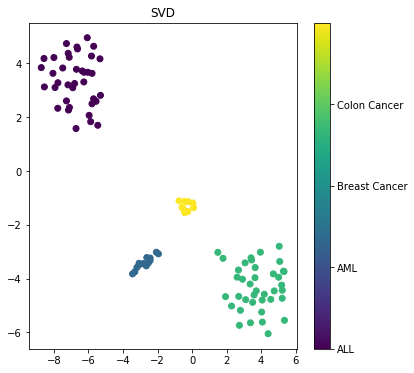

In [190]:
#Reducing dimensionality using svd
from scipy import linalg
import pandas as pd
# reading the data from the text file to the dataframe
data = pd.read_csv(filename, sep="\t", header=None)
print("READING DATA FROM FILE",data)

# Step 1: taking the whole dataset ignoring the last class label
label = data.iloc[:,-1]
print(label)
data = data.drop(data.columns[len(data.columns)-1], axis=1)
print("DATA AFTER DROPPING THE LAST COLUMN",data)
U, s, V = np.linalg.svd(data)
dim_red =2
pca = U[:,:dim_red]
# step 8 : Visualization of the 2D data
# obtaining the unique label from the last column
a = label.unique()
print(a)

# assigning unique colours to the labels 
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(a))]
print(colors)

label = pd.Categorical(pd.factorize(label)[0])
print(label)
# Obtaining the x and the y value
x = []
y = []
for i in range(len(transformed)):
    x.append(transformed[i][0])
print(x)
for j in range(len(transformed)):
    y.append(transformed[j][1])
print(y)
    
# using scatter plot to obtain the 2D image
fig = plt.figure(figsize=(6,6))
plt.scatter(x, y, c=label)
plt.title("SVD")
cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(a)